2024-04-09 03:45:43.141546: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 03:45:43.465633: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 03:45:43.696505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 03:45:50.221394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/dipendu/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


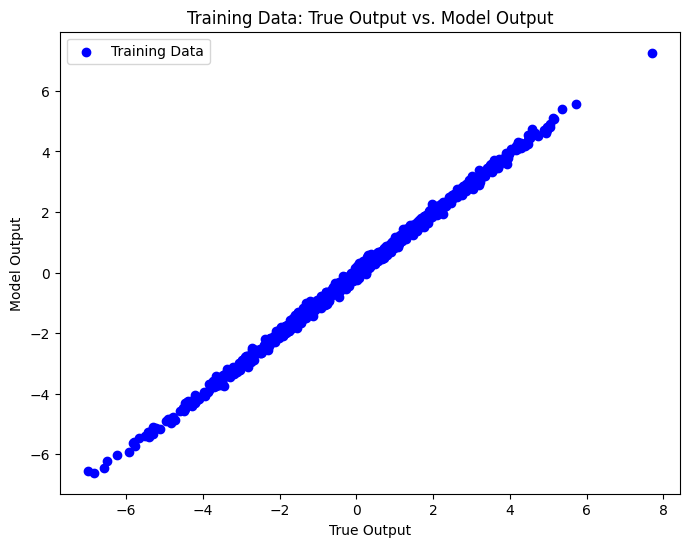

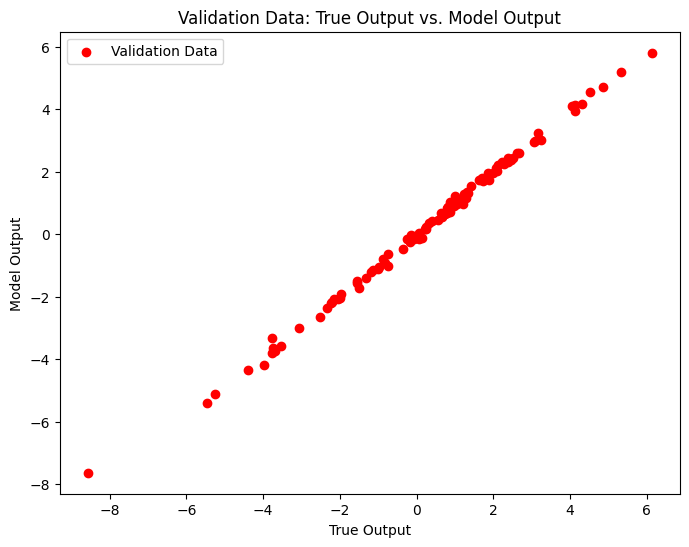

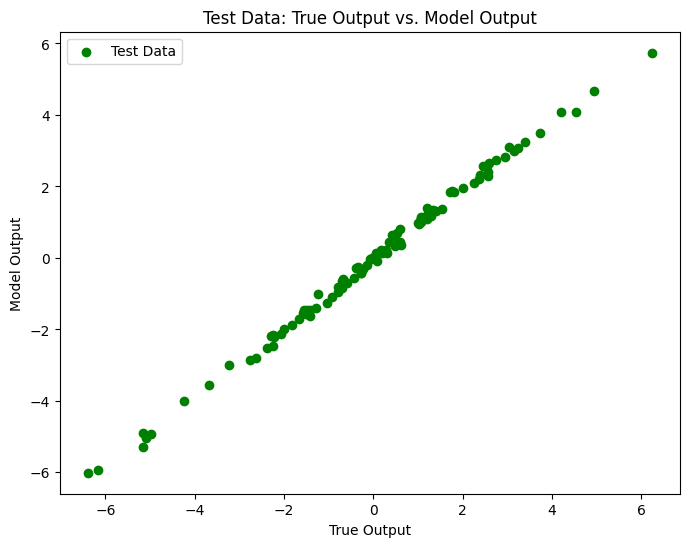

Test Loss: 0.020520256832242012


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Generate synthetic multivariate data
np.random.seed(0)
X = np.random.randn(1000, 5)  # Example of 5-dimensional input data
true_weights = np.random.randn(5, 1)
y = X.dot(true_weights) + np.random.normal(0, 0.1, size=(1000, 1))

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.xlabel('True Output')
plt.ylabel('Model Output')
plt.title('Training Data: True Output vs. Model Output')
plt.legend()
plt.show()

# Scatter plot for validation data
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, color='red', label='Validation Data')
plt.xlabel('True Output')
plt.ylabel('Model Output')
plt.title('Validation Data: True Output vs. Model Output')
plt.legend()
plt.show()

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Test Data')
plt.xlabel('True Output')
plt.ylabel('Model Output')
plt.title('Test Data: True Output vs. Model Output')
plt.legend()
plt.show()

# Print test loss
print("Test Loss:", test_loss)
